# Importing the Libraries

In [1]:
import numpy as np
import colorsys
from sklearn import datasets
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import random
from termcolor import colored

import matplotlib as mpl

In [2]:
XUEBAI = '#fffef9'
YEHUI = '#847c74'
YINBAI = '#f1f0ed'
YINHUI = '#918072'

In [3]:
custom_params = {
    'axes.axisbelow': True,
    'axes.edgecolor': YINBAI,
    'axes.facecolor': XUEBAI,
    'axes.grid': True,
    'axes.labelcolor': YEHUI,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.titlecolor': YEHUI,
    'figure.edgecolor': YINBAI,
    'figure.facecolor': XUEBAI,
    'grid.alpha': .8,
    'grid.color': YINBAI,
    'grid.linestyle': '--',
    'grid.linewidth': 1.2,
    'legend.edgecolor': YINHUI,
    'patch.edgecolor': XUEBAI,
    'patch.force_edgecolor': True,
    'text.color': YEHUI,
    'xtick.color': YINHUI,
    'ytick.color': YINHUI,
}

mpl.rcParams.update(custom_params)

# Pre-installing Required Functions

In [4]:
def bright_colors(n):
    colors = []
    random_degree = np.random.random()
    hue = np.repeat(random_degree / n, n)
    hue_interval = np.linspace(0, 1, n, endpoint=False)
    saturation = 0.875 + np.random.random() / 8.0 * np.random.choice([-1, 1])
    lightness = 0.6 + np.random.random() / 10.0 * np.random.choice([-1, 1])
    h = hue + hue_interval
    s = np.repeat(saturation, n)
    l = np.repeat(lightness, n)
    array_hls = np.concatenate((h, l, s)).reshape(-1, n).T
    for hls in array_hls:
        r, g, b = [
            int(256 * e) for e in colorsys.hls_to_rgb(hls[0], hls[1], hls[2])
        ]
        colors.append('#%02X%02X%02X' % (r, g, b))
    return colors

# Code Implementation

In [5]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts,
                           random_state=123,
                           centers=centers,
                           cluster_std=0.4)
X_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape(100, 1)

In [6]:
def scatter_plot():
    colors = bright_colors(2)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color=colors[0])
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color=colors[1])

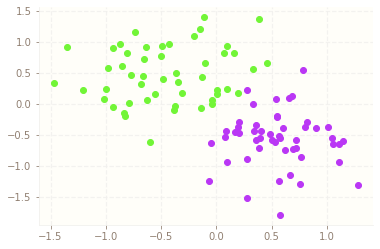

In [7]:
scatter_plot()

In [8]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts,
                             random_state=123,
                             noise=0.1,
                             factor=0.2)
X_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape(500, 1)

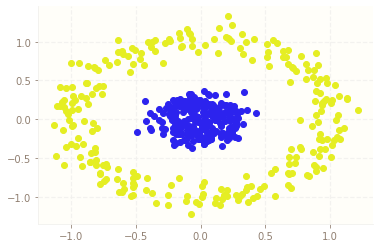

In [9]:
scatter_plot()

In [10]:
class Model(nn.Module):

    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [11]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [12]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [13]:
epochs = 1000
losses = []
termcolors = [
    'grey', 'red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'white'
]
font_colors = random.choices(termcolors, k=2)
for i in range(epochs):
    i += 1
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    if i == 1 or i % 100 == 0:
        print(colored("epoch:", font_colors[0], attrs=['bold']), i,
              colored("loss:", font_colors[1]), loss.item())
        print(colored("weight:", font_colors[1]),
              list(model.parameters())[0][0][0].item(),
              colored("bias:", font_colors[1]),
              list(model.parameters())[1][0].item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1 loss: 0.7148520350456238
weight: 0.16220331192016602 bias: 0.16144263744354248
epoch: 100 loss: 0.6905524134635925
weight: -0.08897451311349869 bias: 0.2542650103569031
epoch: 200 loss: 0.5843154788017273
weight: -2.2341766357421875 bias: -1.0303683280944824
epoch: 300 loss: 0.40495428442955017
weight: -4.128963470458984 bias: -2.5931410789489746
epoch: 400 loss: 0.329036146402359
weight: -3.850017547607422 bias: -3.071533203125
epoch: 500 loss: 0.20069846510887146
weight: -1.415880799293518 bias: -3.24685001373291
epoch: 600 loss: 0.11464511603116989
weight: 0.13244208693504333 bias: -3.6859917640686035
epoch: 700 loss: 0.06716477125883102
weight: 0.9845765233039856 bias: -3.924788236618042
epoch: 800 loss: 0.048937100917100906
weight: 1.3656235933303833 bias: -4.119219779968262
epoch: 900 loss: 0.038923293352127075
weight: 1.5326251983642578 bias: -4.264837741851807
epoch: 1000 loss: 0.032250311225652695
weight: 1.6032304763793945 bias: -4.386478900909424


Text(0.5, 0, 'Epoch')

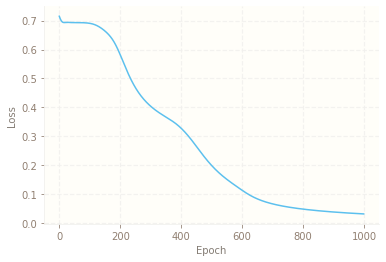

In [14]:
colors = bright_colors(1)
plt.plot(range(epochs), losses, c=colors[0])
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [15]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [16]:
losses = []
font_colors = random.choices(termcolors, k=2)
for i in range(epochs):
    i += 1
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    if i == 1 or i % 100 == 0:
        print(colored("epoch:", font_colors[0], attrs=['bold']), i,
              colored("loss:", font_colors[1]), loss.item())
        print(colored("weight:", font_colors[1]),
              list(model.parameters())[0][0][0].item(),
              colored("bias:", font_colors[1]),
              list(model.parameters())[1][0].item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1 loss: 0.03219418227672577
weight: 1.6036564111709595 bias: -4.387608528137207
epoch: 100 loss: 0.002283715642988682
weight: 2.338900089263916 bias: -6.544594764709473
epoch: 200 loss: 0.0008472403278574347
weight: 2.574104070663452 bias: -7.334736347198486
epoch: 300 loss: 0.000459971692180261
weight: 2.4189774990081787 bias: -7.791497230529785
epoch: 400 loss: 0.00030249301926232874
weight: 2.70613956451416 bias: -8.017717361450195
epoch: 500 loss: 0.00021857795945834368
weight: 3.001237392425537 bias: -8.163111686706543
epoch: 600 loss: 0.0001665927848080173
weight: 3.2274351119995117 bias: -8.257955551147461
epoch: 700 loss: 0.0001304373872699216
weight: 3.3936057090759277 bias: -8.322925567626953
epoch: 800 loss: 0.00010342337191104889
weight: 3.524733781814575 bias: -8.356271743774414
epoch: 900 loss: 8.306376548716798e-05
weight: 3.617349624633789 bias: -8.328813552856445
epoch: 1000 loss: 6.849171768408269e-05
weight: 3.573777437210083 bias: -8.29146671295166


Text(0.5, 0, 'Epoch')

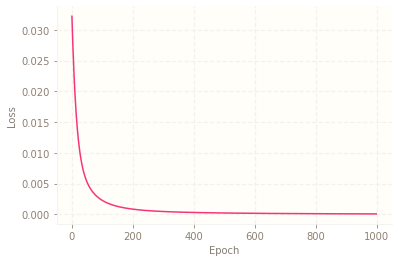

In [17]:
colors = bright_colors(1)
plt.plot(range(epochs), losses, c=colors[0])
plt.ylabel('Loss')
plt.xlabel('Epoch')